Compare differences in two Time Series: 
- look into Bonferroni Correction
- would expect to see independence between two series 
- Hypothesis - is the underlying system different between the two time series? 
- You would expect NYSE and NASDAQ have the same 

In [9]:
libs <- c("odbc", "tidyverse", "lubridate", "ggplot2", "stringr", "ggthemes", "repr", "scales", "dplyr", "TDAstats")

# Load library and if fails
# run install.packages
# function: load_library
load_library<- function(x) {
  if(!require(x, character.only = TRUE)) {
    install.packages(x, repos = "https://cloud.r-project.org")
  }
}

for(lib in libs) {

    load_library(lib)
}

Loading required package: odbc

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: lubridate


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: ggthemes

Loading required package: repr

Loading required package: scales


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Loading required


The downloaded binary packages are in
	/var/folders/52/j639s5494_95vnk9k86mhjy80000gr/T//Rtmp6rGWHt/downloaded_packages


In [10]:
#load and scale closing stock values for JSE and EGX 30
JSE<-scale(read.csv("JSE_Stock.csv")[,2])
EGX<-scale(read.csv("EGX30_Stock.csv")[,2])

In [11]:
#calculate Euclidean distance between pairs of scores
JSE_dist<-dist(JSE,diag=T,upper=T)
EGX_dist<-dist(EGX,diag=T,upper=T)

In [12]:
#load TDAstats package
library(TDAstats)

In [13]:
#create the Vietoris-Rips complexes for each dataset
h_JSE<-calculate_homology(JSE_dist, dim = 1, format = "distmat")
h_EGX<-calculate_homology(EGX_dist, dim = 1, format = "distmat")

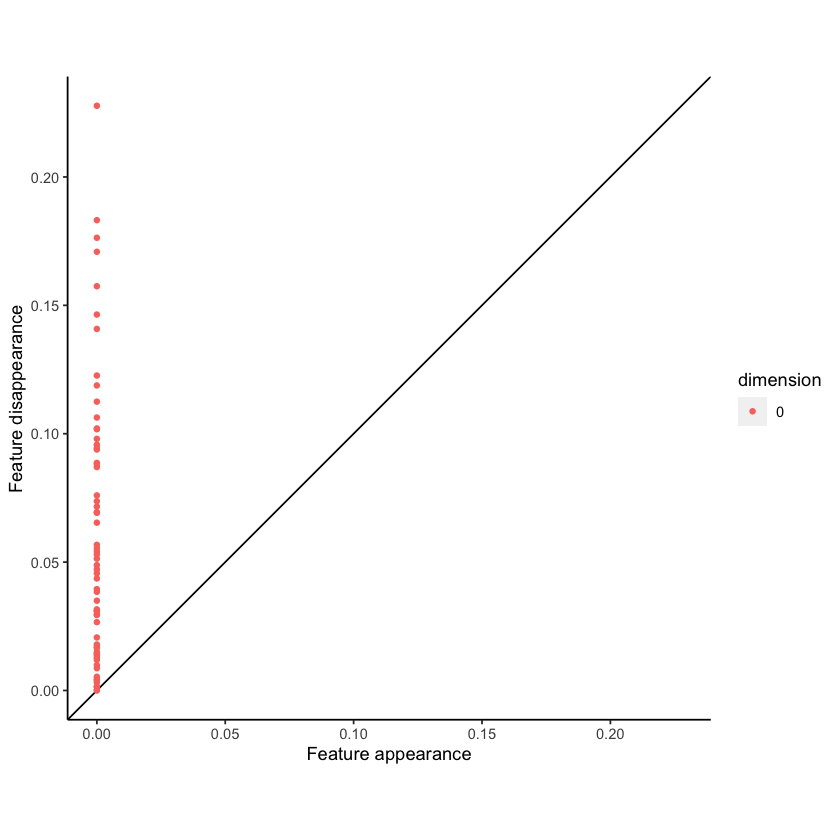

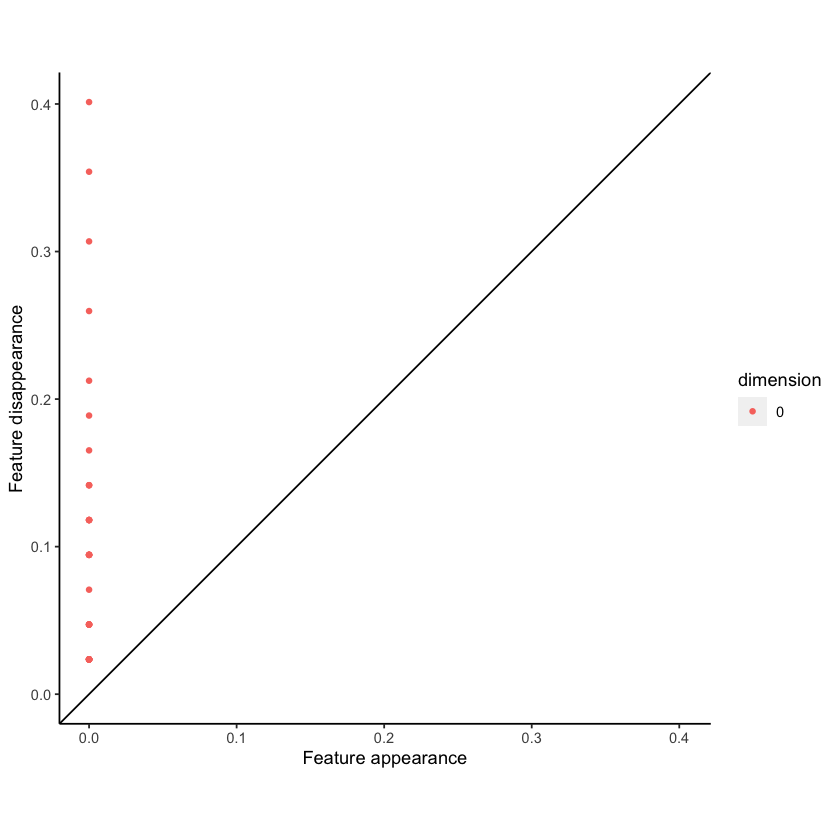

In [14]:
#plot persistence diagrams—circles=connected components (0), triangles=loops (1)
plot_persist(h_JSE)
plot_persist(h_EGX)

In [15]:
#calculate distance between diagrams 
phom.dist(h_JSE,h_EGX)

0 
1.543214

In [16]:

#compute permutation test 
permutation_test(h_JSE,h_EGX,iterations=25)

[[1]]
[[1]]$dimension
[1] 0

[[1]]$permvals
 [1] 0.13219662 0.07951355 0.15299024 0.08777869 0.11399191 0.19285983
 [7] 0.14993433 0.16730854 0.12058796 0.10511380 0.23603868 0.15463216
[13] 0.13608278 0.18886471 0.13616003 0.15893245 0.22212836 0.19311331
[19] 0.14996405 0.15190479 0.17855631 0.22036187 0.13823205 0.20934763
[25] 0.09585818

[[1]]$wasserstein
[1] 0.3188975

[[1]]$pvalue
[1] 0


[[2]]
[[2]]$dimension
[1] 1

[[2]]$permvals
 [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

[[2]]$wasserstein
[1] 0

[[2]]$pvalue
[1] 0